In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
df = pd.read_csv('task19.csv', encoding = "windows-1251", sep = ";")

In [216]:
df.head()

,Дата,Пункт отправления,Пункт назначения,Расстояние,Расход бензина,Масса груза
0,1 октября,Липки,Березки,432,63,770
1,1 октября,Орехово,Дубки,121,17,670
2,1 октября,Осинки,Вязово,333,47,830
3,1 октября,Липки,Вязово,384,54,730
4,1 октября,Березки,Буково,135,19,540


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Дата               370 non-null    object
 1   Пункт отправления  370 non-null    object
 2   Пункт назначения   370 non-null    object
 3   Расстояние         370 non-null    int64 
 4   Расход бензина     370 non-null    int64 
 5   Масса груза        370 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 17.5+ KB


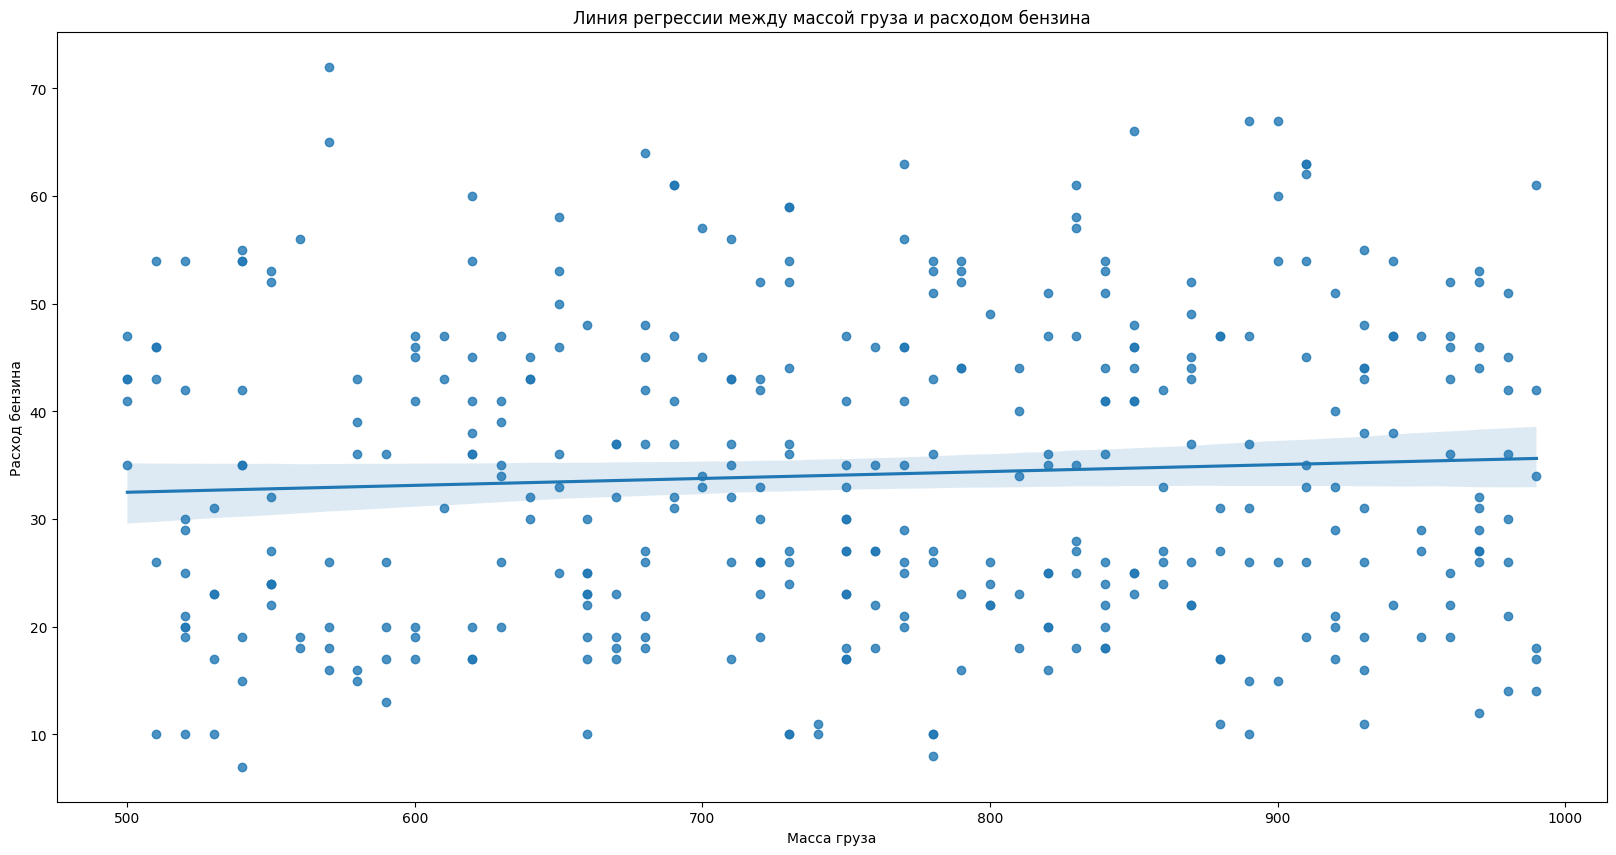

In [218]:
plt.figure(figsize=(20, 10))
sns.regplot(x="Масса груза", y = "Расход бензина", data = df)
plt.title("Линия регрессии между массой груза и расходом бензина")
plt.show()

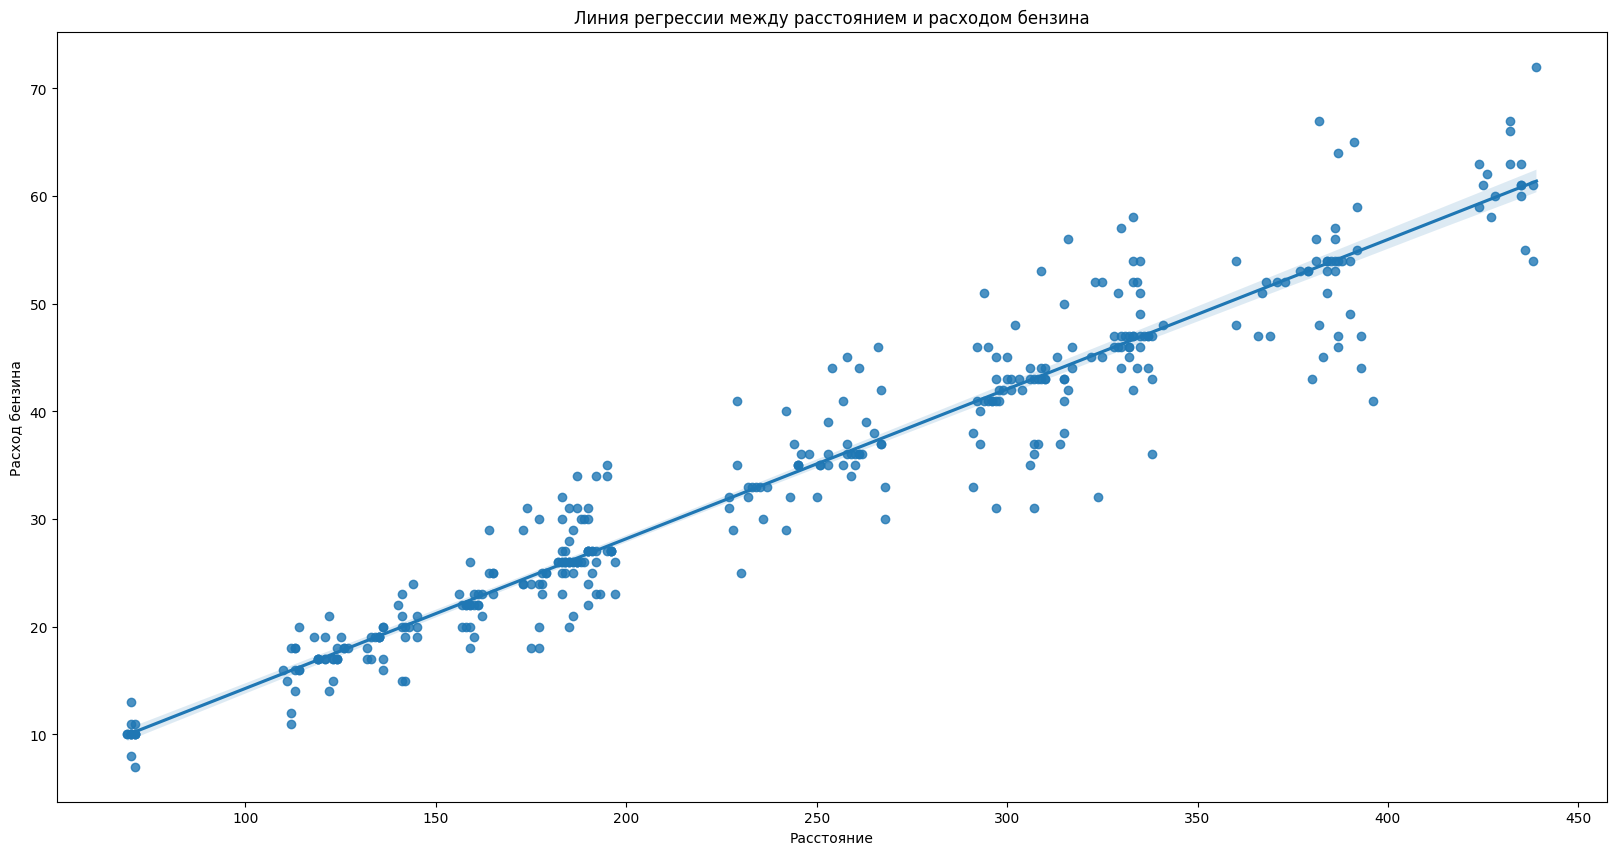

In [219]:
plt.figure(figsize=(20, 10))
sns.regplot(x="Расстояние", y = "Расход бензина", data = df)
plt.title("Линия регрессии между расстоянием и расходом бензина")
plt.show()

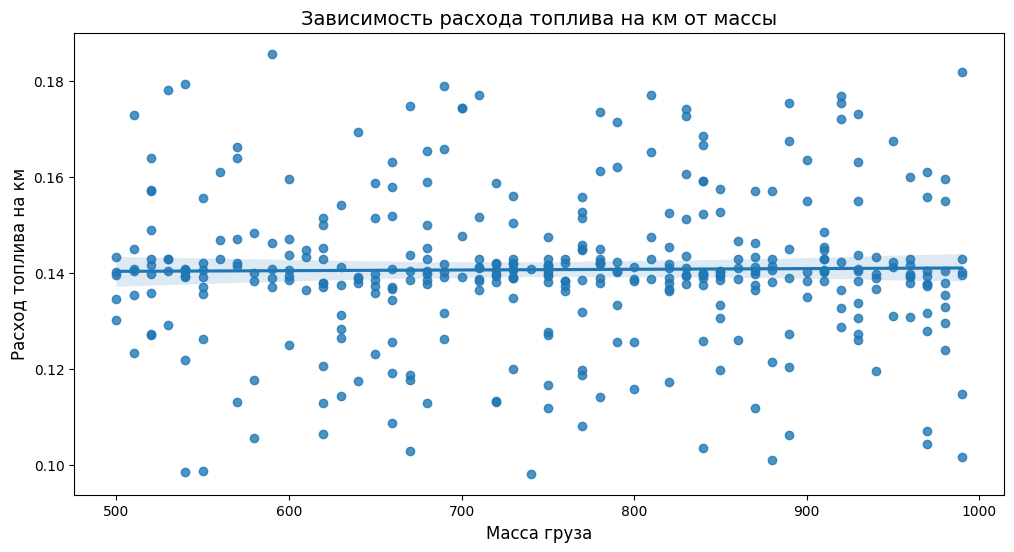

In [220]:
df['Расход на км'] = df['Расход бензина'] / df['Расстояние']

plt.figure(figsize=(12, 6))
sns.regplot(x="Масса груза", y="Расход на км", data=df)

plt.title("Зависимость расхода топлива на км от массы", fontsize=14)
plt.xlabel("Масса груза", fontsize=12)
plt.ylabel("Расход топлива на км", fontsize=12)
plt.show()

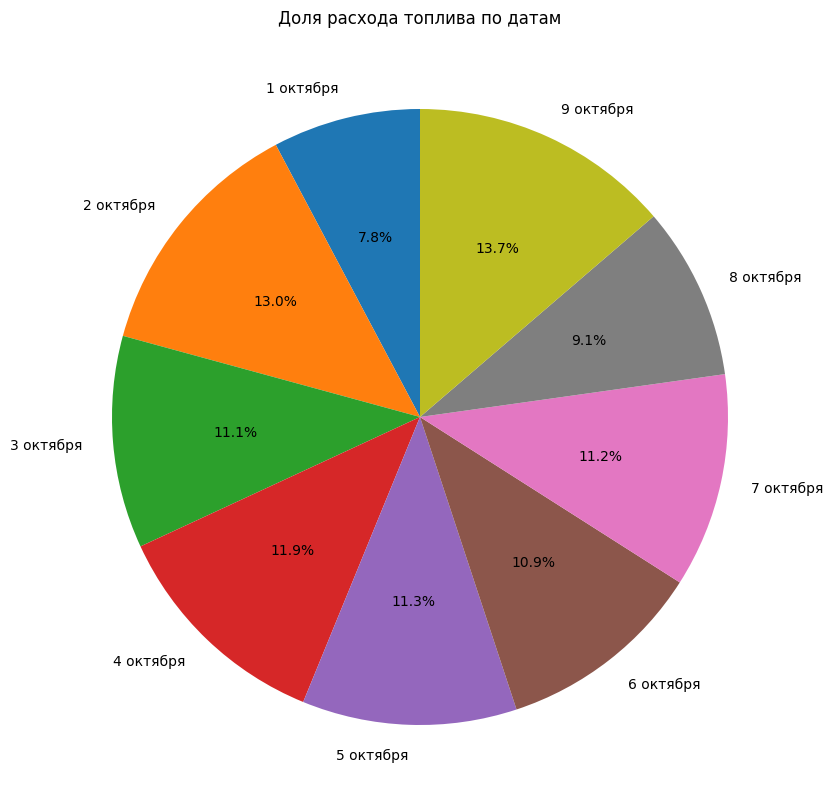

In [221]:
gas = df.groupby('Дата')['Расход бензина'].sum().reset_index()

plt.figure(figsize=(10, 10))
plt.pie(gas['Расход бензина'], 
        labels=gas['Дата'], 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Доля расхода топлива по датам')
plt.show()

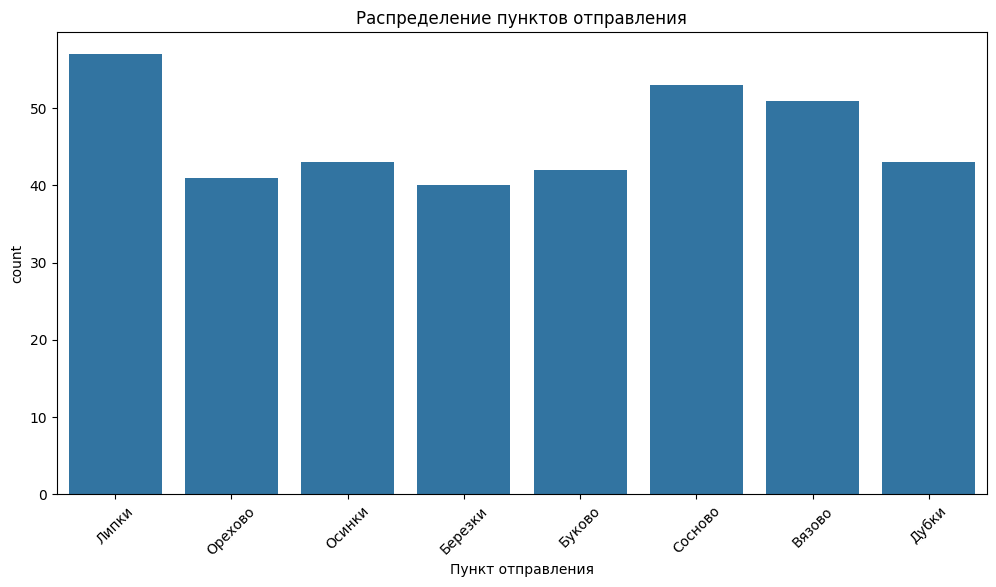

In [222]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Пункт отправления', data=df)
plt.title('Распределение пунктов отправления')
plt.xticks(rotation=45)
plt.show()

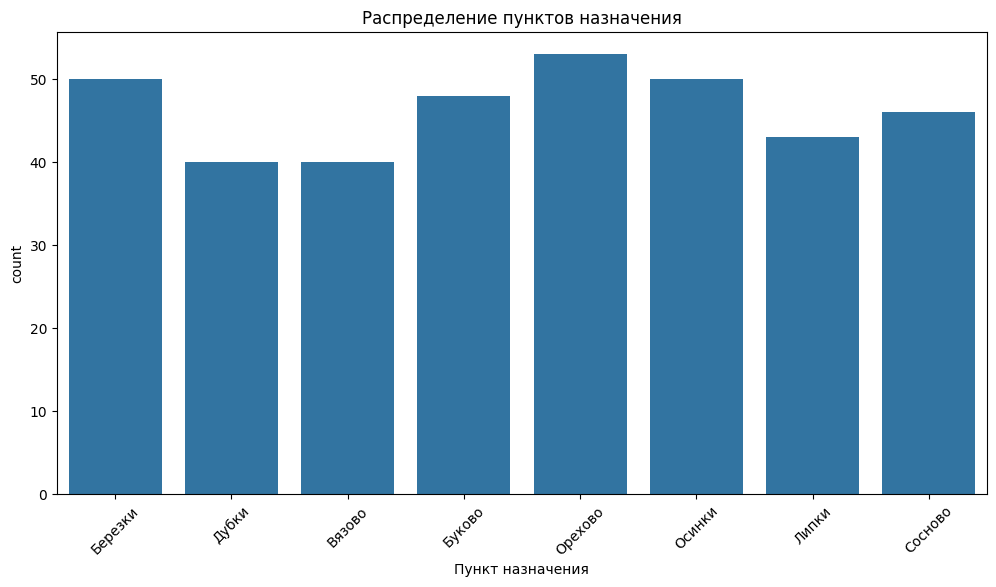

In [223]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Пункт назначения', data=df)
plt.title('Распределение пунктов назначения')
plt.xticks(rotation=45)
plt.show()

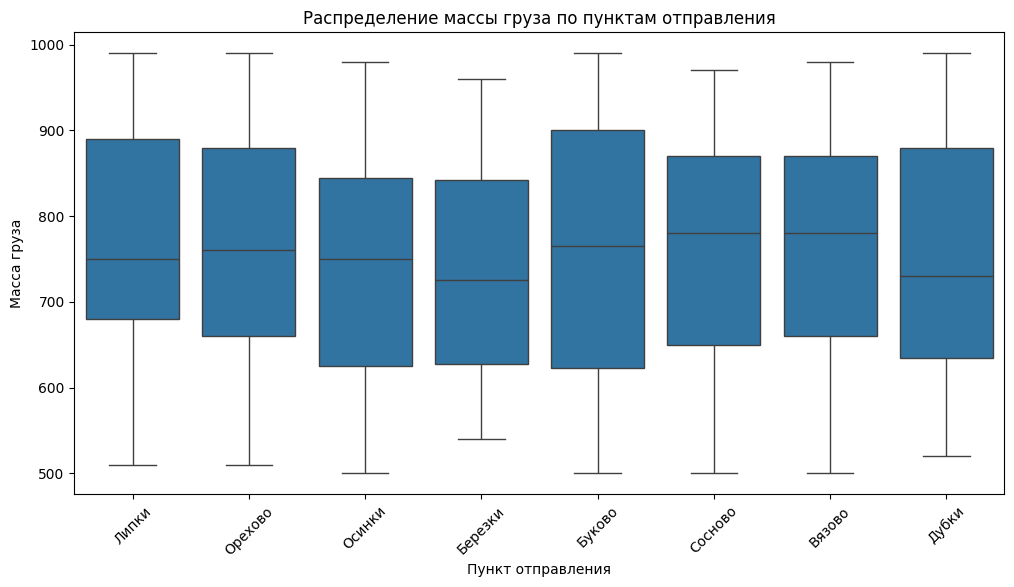

In [224]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Пункт отправления', y='Масса груза')
plt.title('Распределение массы груза по пунктам отправления')
plt.xticks(rotation=45)
plt.show()

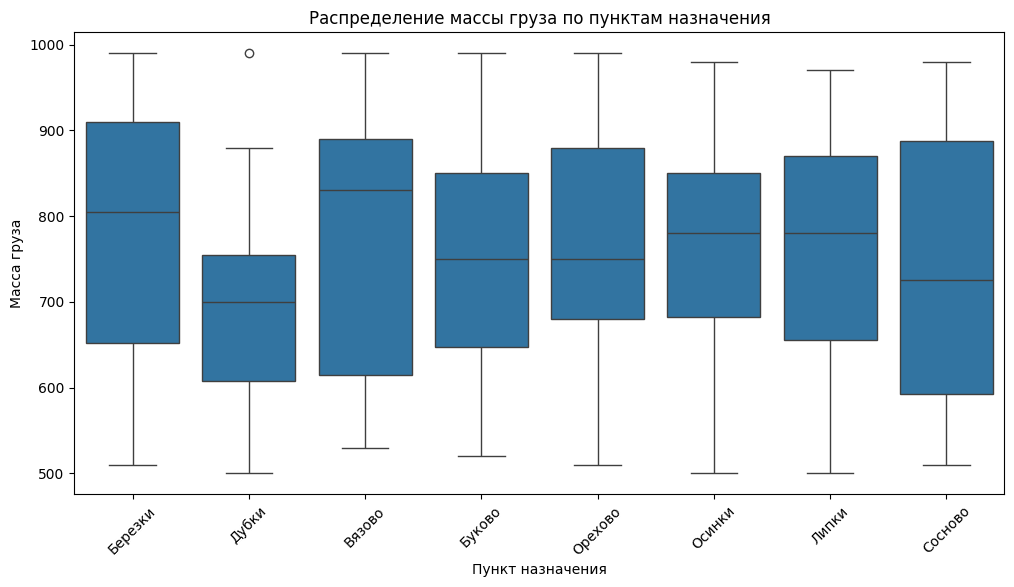

In [225]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Пункт назначения', y='Масса груза')
plt.title('Распределение массы груза по пунктам назначения')
plt.xticks(rotation=45)
plt.show()

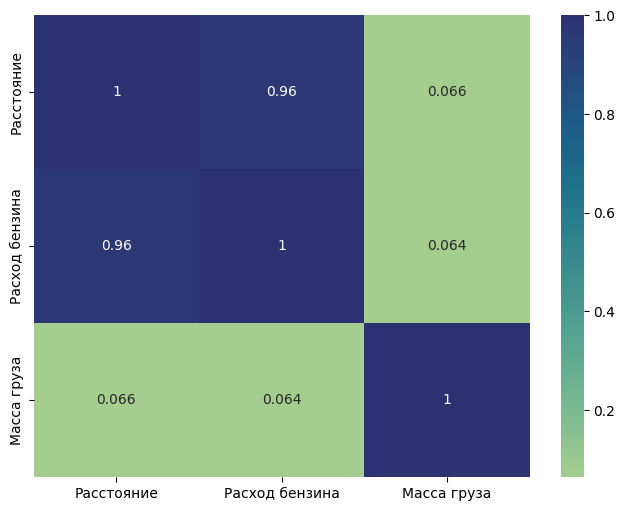

In [226]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['Расстояние', 'Расход бензина', 'Масса груза']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()